SHIVANI TRIVEDI

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
import plotly.express as px

In [17]:
url = r"C:\Users\Shivani\OneDrive\Desktop\Car_Details_original.csv"
df = pd.read_csv(url)

# Displaying some basic information about the provided dataset along with displaying some starting rows
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Type         428 non-null    object 
 2   Origin       428 non-null    object 
 3   DriveTrain   428 non-null    object 
 4   EngineSize   428 non-null    float64
 5   Cylinders    426 non-null    float64
 6   Horsepower   428 non-null    int64  
 7   MPG_City     428 non-null    int64  
 8   MPG_Highway  428 non-null    int64  
 9   Weight       428 non-null    int64  
 10  Wheelbase    428 non-null    int64  
 11  Length       428 non-null    int64  
 12  MSRP         428 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 43.6+ KB


,Make,Type,Origin,DriveTrain,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,MSRP
0,Acura,SUV,Asia,All,3.5,6.0,265,17,23,4451,106,189,36945
1,Acura,Sedan,Asia,Front,2.0,4.0,200,24,31,2778,101,172,23820
2,Acura,Sedan,Asia,Front,2.4,4.0,200,22,29,3230,105,183,26990
3,Acura,Sedan,Asia,Front,3.2,6.0,270,20,28,3575,108,186,33195
4,Acura,Sedan,Asia,Front,3.5,6.0,225,18,24,3880,115,197,43755


In [19]:
# Data Cleaning Operation 1: Handling Missing Values
# Also Task-2 (To handle missing values)
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)
df_cleaned_missing = df.dropna()


# Data Cleaning Operation 2: Removing Duplicates
duplicates_count = df.duplicated().sum()
print("Number of Duplicates:", duplicates_count)
df_cleaned_duplicates = df.drop_duplicates()


# Saving and overwriting from my original dataset (So that it doesn't have any null or duplicate  values)
df_cleaned_missing.to_csv('Car_Details_original.csv', index=False)
df_cleaned_duplicates.to_csv('Car_Details_original.csv', index=False)

Missing Values:
 Make           0
Type           0
Origin         0
DriveTrain     0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
MSRP           0
dtype: int64
Number of Duplicates: 0


C:\Users\Shivani\AppData\Local\Temp\ipykernel_9540\2590622131.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


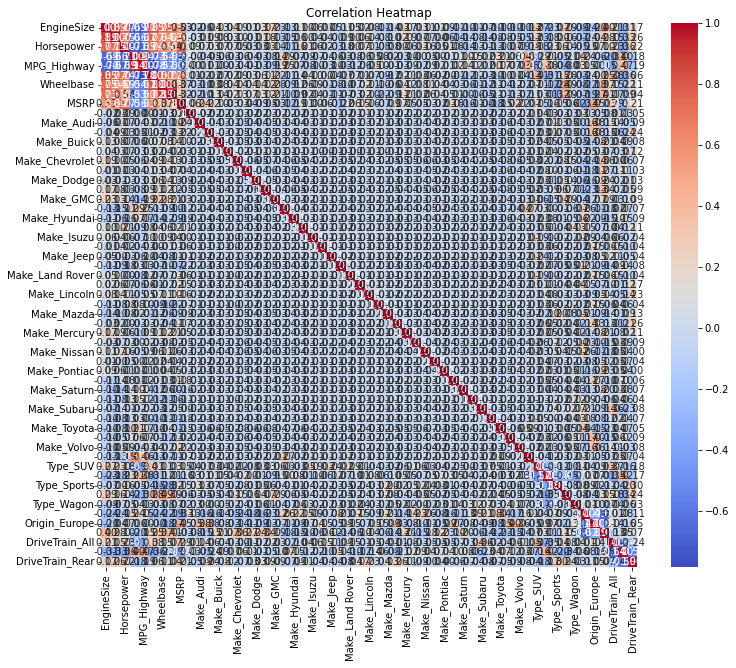

In [23]:
# Here I'm trying to fill any missing or null values with the numerical mean values (BUT this code will not execute, as there are NO NULL VALUES)
df.fillna(df.mean(), inplace=True)


# Task 3 -  Handling Outliers
df = df[df['MSRP'] < df['MSRP'].quantile(0.95)]


# Task 4 - Perform encoding of necessary columns using the right techniques
df_encoded = pd.get_dummies(df, columns=['Make', 'Type', 'Origin', 'DriveTrain'])

# Continuing Task 4 - To present the Correlation Heatmap
corr_matrix = df_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [24]:
# Here I'm making other necessary data transformations 
X = df_encoded.drop('MSRP', axis=1)
y = df_encoded['MSRP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Task 5 - Build a multiple linear regression model
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X_train, y_train)

# Continuing task 5 - To report the coefficients and intercept after other necessary data transformations 
coefficients = model.named_steps['linearregression'].coef_
intercept = model.named_steps['linearregression'].intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 7.23972329e+02  3.77242663e+02  2.20043632e+03  8.04528630e+02
 -1.17501621e+03  2.83074507e+03 -3.58343000e+01 -5.43598513e+01
  7.26848436e+15  2.71240774e+16  2.71240774e+16  1.68773839e+16
  6.04448196e+15  2.54704197e+16  1.68773839e+16  1.87989485e+16
  2.48392709e+16  1.04312100e+16  1.53821334e+16  1.30991383e+16
  1.02225541e+16  5.94555209e+15  8.72128549e+15  1.04312100e+16
  1.24502707e+16  8.72128549e+15  5.94555209e+15  1.04312100e+16
  8.72128549e+15  1.17601890e+16  2.43515465e+16  1.58167736e+16
  1.37126436e+16  1.53821334e+16  1.04312100e+16  1.96794075e+16
  2.11676021e+16  1.68773839e+16  5.94555209e+15  1.10211540e+16
  1.10211540e+16  1.97518510e+16  2.71240774e+16  2.43515465e+16
  5.47659074e+15  1.77879217e+16  2.51559201e+16  1.36931485e+16
  1.19738612e+16  1.43052857e+16  1.01823502e+15 -2.91591147e+16
 -1.37305022e+16  4.71889934e+16  5.74172061e+16  4.50874203e+16]
Intercept: 25304.473359535867


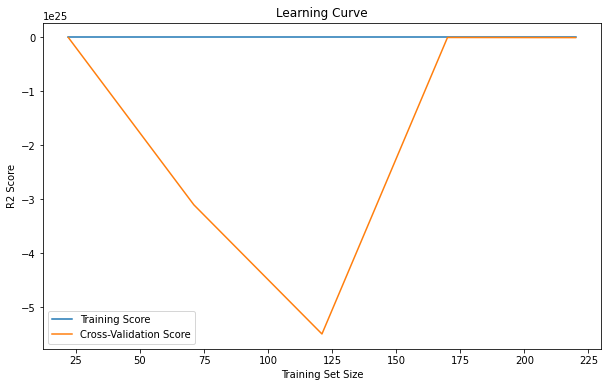

In [25]:
# Task 6 - Plotting the Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('R2 Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [26]:
# Task 7 - Presenting and evaluating the result of the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R2 Score:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

R2 Score: 0.8551816706405202
Mean Absolute Error: 2649.11276340205
Root Mean Squared Error: 3357.6637072413687


In [28]:
# Continuing task 7, explaining the result of the values 

R2 scores (determining factor): 
 
 The R2 score measures the proportion of  variance in the independent variable (in this case, MSRP) that is predictable from the independent variables. 
 
 The R2 score ranges from 0 to 1, where 1 represents a perfect prediction. In my case, the R2 score of 0.8551 (85.51%) is quite high. 
 
 This suggests that the independent variables in my model can explain about 85.51% of the variance in  car's MSRP.

Mean Absolute Error (MAE): 
 
 MAE represents the average absolute difference between forecast MSRP and  actual MSRP. 
    
 In my case,  MAE is 2649.11, which means the average MSRP for my models and projections is about $2,649.11 lower.

 Lower MAE values ​​are better, and the absolute nature of MAE makes it easier to interpret.

Root Mean Square Error (RMSE): 
 
 RMSE is similar to MAE, but gives more weight to large errors because it requires taking the square root of the mean square difference between predicted and actual values.
    
 In my case, the RMSE is 3357.66, which represents the standard deviation of the residuals and, on average, the forecasts differ by about $3,357.66. 

 Like MAE, lower RMSE values ​​indicate better model performance.



SHIVANI TRIVEDI
